In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import seaborn as sns
from folium import plugins
from folium.plugins import HeatMap
from scipy.stats import ttest_ind
from datetime import datetime

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [230]:
theft = pd.read_csv('Car_thefts2016.csv')

#### Executive Notes
An analysis of Police Data from Jan-Jun 2016 in the City of Chicago offers insights on how to properly steal a car in the city.

I lay down recommendations on when and where to steal these cars. Around Midway Airport at any time of day should do nicely for a while.

# How to Steal a Car in Chicago

In the market for a used car in the City of Chicago? You can find much wisdom when it comes to finding the best used car on Craigslist, Ebay, or from a certified seller. But, why buy a car when you can steal one? According to police data from the City of Chicago, during the first 6 months of 2016, 5073 cars were stolen with a nearly 90% success rate.

I will be presenting some information on how Chicago car thieves have managed to be so successful and also providing tips if you are looking to steal your first car.

The questions you must be asking by now:
What time/day/month are cars being stolen? More importantly, what time/day/month are cars being stolen without anyone getting arrested?

Where are cars being stolen and where are people getting away with it?

I will answer these questions for you.

## When are cars being stolen successfully?

You may be wondering if now is the right time of year for stealing cars. Maybe you think you need to be like an evil Batman stalking the streets at night to find your new Batmobile. If that is the case, I can tell you that even Batman would start by analyzing the data and finding the best strategy. First, let's sort the data out by time of day, day of the week, and month of the year to see what's going on.

In [231]:
#Creating a DateTime Column
new_column = []

for date in theft['Date']:
    date_format = "%m/%d/%Y %I:%M:%S %p"
    new_column.append(datetime.strptime(date, date_format))
theft['DateTime'] = new_column

In [232]:
#Creating more date related columns
theft['Month'] = theft['DateTime'].apply(lambda x: x.month)
theft['Hour'] = theft['DateTime'].apply(lambda x: x.hour)
theft['Day'] = theft['DateTime'].apply(lambda x: x.day)
theft['Day of week'] = theft['DateTime'].apply(lambda x: x.dayofweek)

In [233]:
month_of_theft = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
time_of_crime = ['12a', '1a', '2a', '3a', '4a', '5a', '6a', '7a', '8a', '9a', '10a', '11a', '12p', '1p', '2p', '3p', '4p', '5p', '6p', '7p', '8p', '9p', '10p', '11p']
weekday_of_crime = ['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']

# All Car Thefts

Below, you can see bar graphs that demonstrate which month, date, and day of the week cars are being stolen.

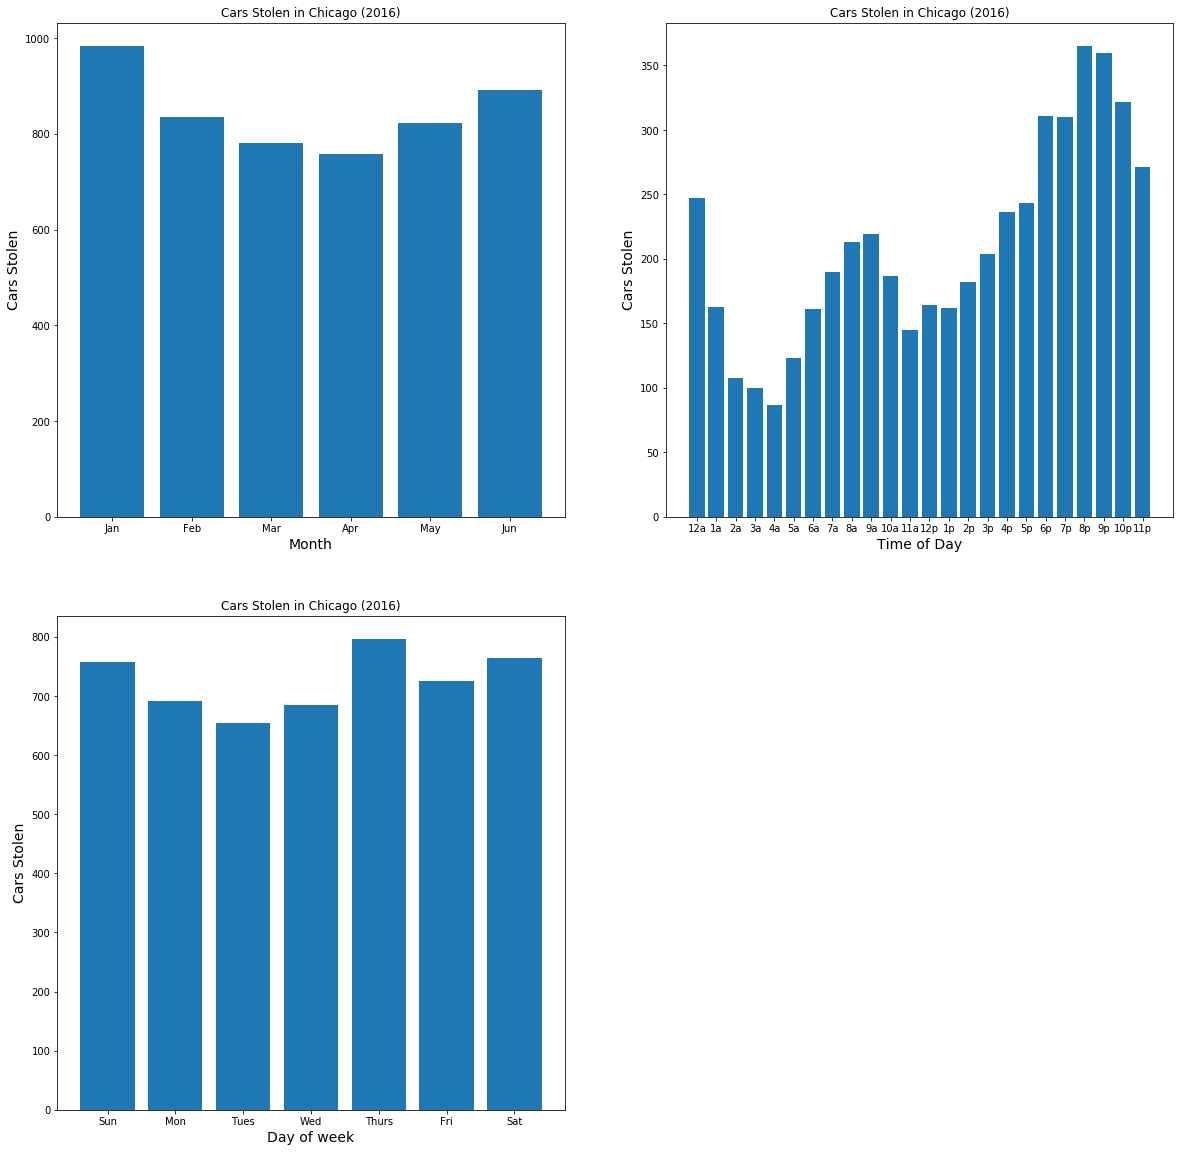

In [234]:
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.bar(month_of_theft, theft['Month'].value_counts().sort_index())
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)')

plt.subplot(2,2,2)
plt.bar(time_of_crime, theft['Hour'].value_counts().sort_index())
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)')

plt.subplot(2, 2, 3)
plt.bar(weekday_of_crime, theft['Day of week'].value_counts().sort_index())
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)')

plt.show()

You will notice that quite a lot of cars are being stolen during the bitter cold month of January, then thieves back off slightly for spring and ramp it up again in the summer.

The time of day is the most important graph to keep your eye on as there are extreme differences. It would appear that time of day is the main factor that affects the choice of whether to go for it or not.

Admittedly, I was expecting there to be fewer car thefts on weekends when most of the working population (not to say stealing cars isn't work) is at home. But this is not the case. Car thefts continue straight through the weekend.

Great, we know when people have been stealing cars, what day of week, and which months of the year. But not all robberies were created equal. Let's compare the robberies where someone got arrested with the ones where the thief got away.

In [235]:
#I am creating a new column called "Car Value" so I can use it later.
theft['Car Value'] = range(5073)
theft.loc[theft.Arrest == False, 'Car Value'] = list(np.random.normal(5000, 1000, 4565))
theft.loc[theft.Arrest == True, 'Car Value'] = list(np.random.normal(12000, 3000, 508))

In [236]:
theft_caught = theft[theft['Arrest'] == True]
theft_not_caught = theft[theft['Arrest'] == False]

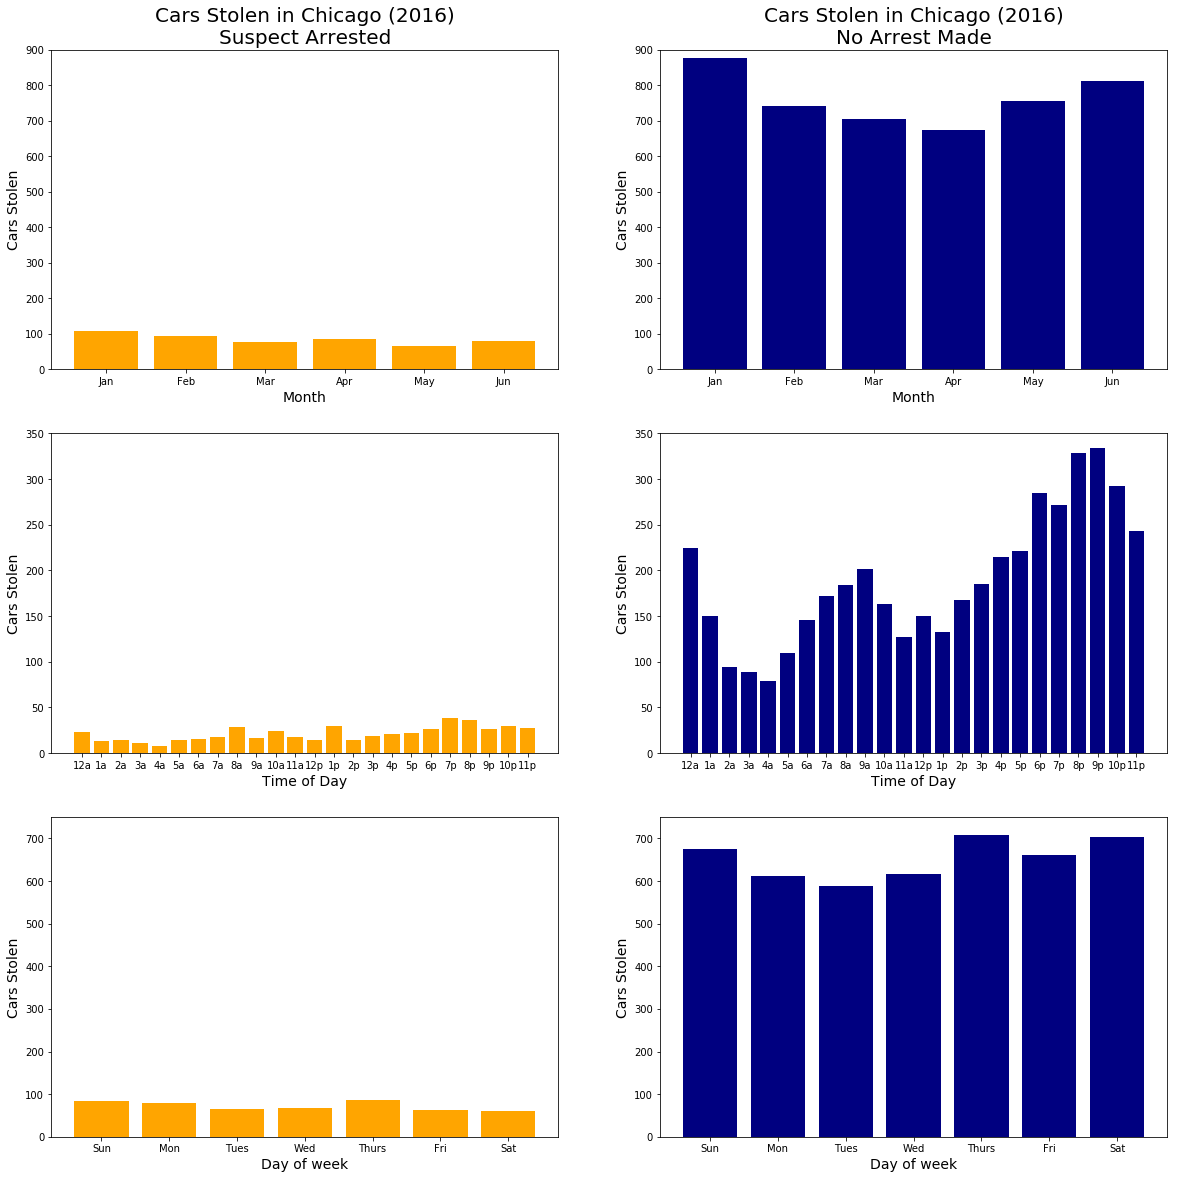

In [237]:
plt.figure(figsize=(20,20))

#top left
plt.subplot(3, 2, 1)
plt.bar(month_of_theft, theft_caught['Month'].value_counts().sort_index(), color='orange')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)\nSuspect Arrested', fontsize=20)
plt.ylim(0, 900)

#middle left
plt.subplot(3,2,3)
plt.bar(time_of_crime, theft_caught['Hour'].value_counts().sort_index(), color='orange')
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.ylim(0, 350)

#bottom left
plt.subplot(3, 2, 5)
plt.bar(weekday_of_crime, theft_caught['Day of week'].value_counts().sort_index(), color='orange')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.ylim(0, 750)


#top right
plt.subplot(3, 2, 2)
plt.bar(month_of_theft, theft_not_caught['Month'].value_counts().sort_index(), color='navy')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.title('Cars Stolen in Chicago (2016)\nNo Arrest Made', fontsize=20)
plt.ylim(0, 900)

#middle right
plt.subplot(3, 2, 4)
plt.bar(time_of_crime, theft_not_caught['Hour'].value_counts().sort_index(), color='navy')
plt.ylim(0, 350)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)

#bottom right
plt.subplot(3, 2, 6)
plt.bar(weekday_of_crime, theft_not_caught['Day of week'].value_counts().sort_index(), color='navy')
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Cars Stolen', fontsize=14)
plt.ylim(0, 750)

plt.show()

At a glance this seems to say we should avoid stealing on Thursday, it looks like just waiting for Saturday, when just as many cars are being stolen and significantly fewer thieves are being apprehended, would be a good decision. You may be making similar conclusions about certain times of the day or months of the year. Let's see if the percentages agree with this conclusion.

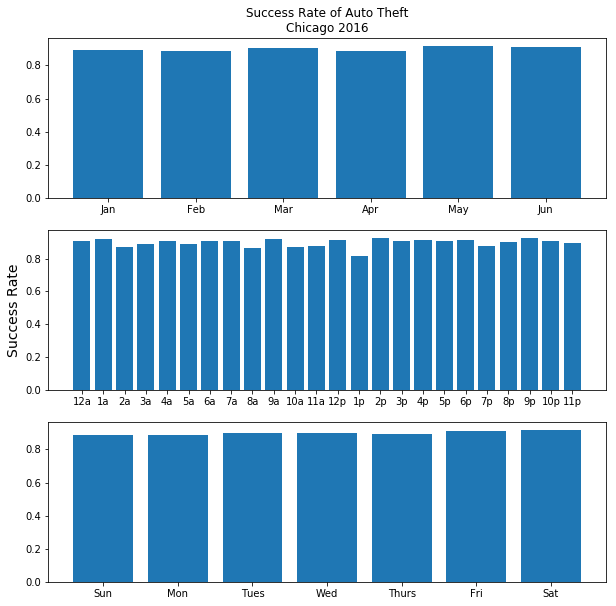

In [238]:
plt.figure(figsize=(10,10))


plt.subplot(3, 1, 1)
plt.title("Success Rate of Auto Theft\nChicago 2016")
plt.bar(month_of_theft , theft_not_caught['Month'].value_counts().sort_index()/theft['Month'].value_counts().sort_index())


plt.subplot(3, 1, 2)
plt.bar(time_of_crime, theft_not_caught['Hour'].value_counts().sort_index()/theft['Hour'].value_counts().sort_index())
plt.ylabel('Success Rate', fontsize=14)

plt.subplot(3, 1, 3)
plt.bar(weekday_of_crime, theft_not_caught['Day of week'].value_counts().sort_index()/theft['Day of week'].value_counts().sort_index())

plt.show()

Day and Month seems to have almost no impact on the success. It's interesting to note that weekends, when presumably fewer people are working, does not lead to a decrease in theft.

The most notable time of day is 1pm where there is almost a 10% lower success rate than other times. Noon and 2pm are just as successful as any other time, so it might just be a fluke in the data.


## Where is the best place to steal cars?

The data on time, month, and day told us that this stealing business is good all year, all week, and all day (except, perhaps, at 1pm). That is helpful in eliminating excuses. No longer can we say, "It's the weekend, we should wait for Monday to go get a car." My dad used to tell me, "If you wait for the conditions to be perfect, you will never get anything done." So it is with car stealing.

But we still want to increase our odds of getting away with cars and not going behind bars. Let's turn our attention towards the location in the city and see if we can follow in others' footsteps to help you steal your first car.

It is important to note that this data is taken from the police website and they are, of course, analyzing it as well. We must be careful to always use the most up-to-date data as they will likely make adjustments if everyone reading this starts stealing from the same area.

As before, I will visualize all the thefts, then separate by successful and unsuccessful ones.

In [239]:
#converting Latitude and Longitude columns into lists
lat = list(theft['Latitude'])
lon = list(theft['Longitude'])

In [240]:
#Generating a Folium Map in Chicago
m = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [241]:
#Getting our data into the right format, removing any missing listings
heat_theft = theft
heat_theft = heat_theft[['Latitude', 'Longitude']]
heat_theft = heat_theft.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [242]:
#Using iterrows by copying it off somewhere online, looks handy
heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_theft.iterrows()]

In [243]:
HeatMap(heat_data, radius=17).add_to(m)

## HeatMap of All Chicago Car Thefts (Jan-Jun 2016)

In [244]:
m

Next, let's create a HeatMap of just the thefts where there was an arrest made. This will help us know which areas to avoid when stealing a car.

In [245]:
lat_caught = list(theft_caught['Latitude'])
lon_caught = list(theft_caught['Longitude'])

In [246]:
m_caught = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [247]:
#Getting our data into the right format, removing any missing listings
heat_theft_caught = theft_caught
heat_theft_caught = heat_theft_caught[['Latitude', 'Longitude']]
heat_theft_caught = heat_theft_caught.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [248]:
#Using iterrows by copying it off somewhere online, looks handy
heat_data_caught = [[row['Latitude'], row['Longitude']] for index, row in heat_theft_caught.iterrows()]

In [249]:
HeatMap(heat_data_caught, radius=17).add_to(m_caught)

## HeatMap of All Arrested Car Thieves (Jan-Jun 2016)

In [250]:
m_caught

In [251]:
lat_not_caught = list(theft_not_caught['Latitude'])
lon_not_caught = list(theft_not_caught['Longitude'])

In [252]:
m_not_caught = folium.Map(location=[41.868035989, -87.721605044], zoom_start=10)

In [253]:
#Getting our data into the right format, removing any missing listings
heat_theft_not_caught = theft_not_caught
heat_theft_not_caught = heat_theft_not_caught[['Latitude', 'Longitude']]
heat_theft_not_caught = heat_theft_not_caught.dropna(axis=0, subset=['Latitude', 'Longitude'])

In [254]:
#Using iterrows by copying it off somewhere online, looks handy
heat_data_not_caught = [[row['Latitude'], row['Longitude']] for index, row in heat_theft_not_caught.iterrows()]

In [255]:
HeatMap(heat_data_not_caught, radius=17).add_to(m_not_caught)

## HeatMap of Thousands of Proud New Car Owners (Jan-Jun 2016)

In [256]:
m_not_caught

### Summary of Where to Steal From

I would highly recommend avoiding the dark red clumps when stealing a car. Of note are the areas around airports. O'Hare is towards the Northwest of the map and Midway is in the Southwest. No one seems to get caught around Midway. Rental centers near O'Hare seem like a hotspot. Especially Alamo and Hertz. I would strongly recommend targeting Alamo because they have not made a single arrest while Hertz thieves have been caught quite a bit.

### Value of Cars To Steal
Up until this point, I have been advising you to steal cars with pretty much no reservations. But now we will consider the risks/rewards of stealing a car. We will look at the value of the cars that were successfully stolen and compare them with the value of the cars that sent car thieves to jail.

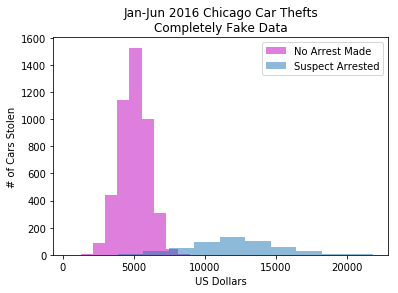

In [257]:
#I created a fake column of data in order to show my ability to do statistical analysis
plt.hist(theft_not_caught['Car Value'], label='No Arrest Made', alpha=0.5, color='m')
plt.hist(theft_caught['Car Value'], label='Suspect Arrested', alpha=0.5)
plt.xlabel("US Dollars")
plt.ylabel("# of Cars Stolen")
plt.title("Jan-Jun 2016 Chicago Car Thefts\nCompletely Fake Data")
plt.legend()
plt.show()

As you can see, there is a trade-off. If you try to steal more expensive cars, you are more likely to get caught. I would like to run one more statistical test to see if perhaps, due to this sample size, this could be a fluke in the data. I will use a statistical t-test for this.

In [258]:
ttest_ind(theft_not_caught['Car Value'], theft_caught['Car Value'], equal_var=False)

Ttest_indResult(statistic=-51.71386592039598, pvalue=7.38250264295185e-207)

This test came out with a very low p-value. This makes it extremely unlikely that the difference in car value we noticed was just a fluke due to a small sample size. What does the car value look like on a boxplot?

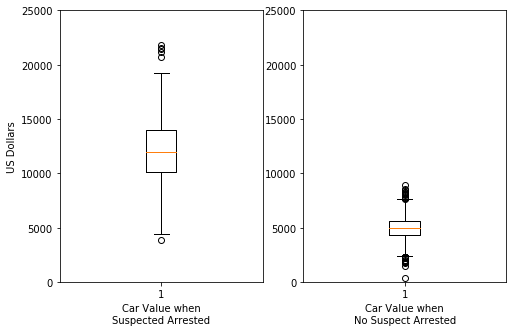

In [259]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
plt.boxplot(theft_caught['Car Value'])
plt.ylim(0, 25000)
plt.ylabel('US Dollars')
plt.xlabel('Car Value when\nSuspected Arrested')

plt.subplot(1, 2, 2)
plt.boxplot(theft_not_caught['Car Value'])
plt.ylim(0, 25000)
plt.xlabel('Car Value when\nNo Suspect Arrested')
plt.show()

This shows clearly that while it is no guarantee, staying under $5000 seems to be a good idea. Perhaps people are more cautious or protective of their more valuable vehicles.

# So How Do You Steal A Car In Chicago?

Hey, I just run the numbers. If you want a guide on how to actually go about taking the car, I can't help you there. What I have done is answered the questions of when and where Chicago car thieves have (quite successfully) been stealing cars.

Your success rate should not be impacted too much by the time of day, the month of the year, or the day of the week. So, you are left with no excuses there. And when it comes to locations. The airports are great hotspots where the police have been largely ineffective. Midway is great and if you are stealing from a rental center near O'Hare, avoid Hertz. Steal from Alamo.

It is also important to note that car value will have a large impact on how successful you are in stealing these cars. Cars under $5000 give you a very good chance of getting away.